# Assignment 1

**Student Name**: Oak Soe Kyaw

**Student ID**: ST125064


# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset


In [3]:
df = pd.read_csv('./data/Predicting Car Prices.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Data Set Cleaning


In [9]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

For the feature owner, map First owner to 1, ..., Test Drive Car to 5


In [10]:
#mapping the owner column
owner_map={
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5,
}

df['owner'] = df['owner'].map(owner_map)
df["owner"].unique()

array([1, 2, 3, 4, 5])

For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol


In [11]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
#removing rows of fuel with CNG LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).


In [14]:
print(df['mileage'].head())

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object


In [15]:
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [16]:
print(df['mileage'].head())

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64


For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)


In [17]:
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['engine'].unique()

array([1248., 1498., 1497., 1396., 1298., 1197.,  796., 1364., 1399.,
       1461.,  993.,   nan, 1061., 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

Do the same for Max_Power.


In [18]:
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)
df['max_power'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  37.   ,
        67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
       121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,  67.05 ,
       168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 , 171.5  ,
       100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,  86.8  ,
       108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,  67.04 ,
        68.05 ,  82.85 ,  81.8  ,  73.   , 120.   ,  94.68 , 160.   ,
        65.   , 155.   ,  69.01 , 126.32 , 138.1  ,  83.8  , 126.2  ,
        98.96 ,  62.1  ,  86.7  , 188.   , 214.56 , 177.   , 280.   ,
       148.31 , 254.79 , 190.   , 177.46 , 204.   , 141.   , 117.6  ,
       241.4  , 282.   , 150.   , 147.5  , 108.5  , 103.5  , 183.   ,
       181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,  68.   ,  75.   ,
        85.8  ,  87.

For the feature brand, take only the first word and remove the rest


In [19]:
df['name']=df['name'].str.split(' ').str[0]
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

Drop the feature torque, simply because Chaky’s company does not understand well about it


In [20]:
df=df.drop(columns=['torque'])

In [21]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [22]:
df = df[df['owner'] != 5]


Selling Price Log Transfomations


In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [24]:
# Apply log transformation to the selling price
df['selling_price'] = np.log(df['selling_price'])

In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Encoding Labels


In [26]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['name']=le.fit_transform(df['name']) 
df['fuel']=le.fit_transform(df['fuel']) 
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission']) 

In [27]:
df['name'].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

# Plot Testings


<Axes: xlabel='selling_price', ylabel='count'>

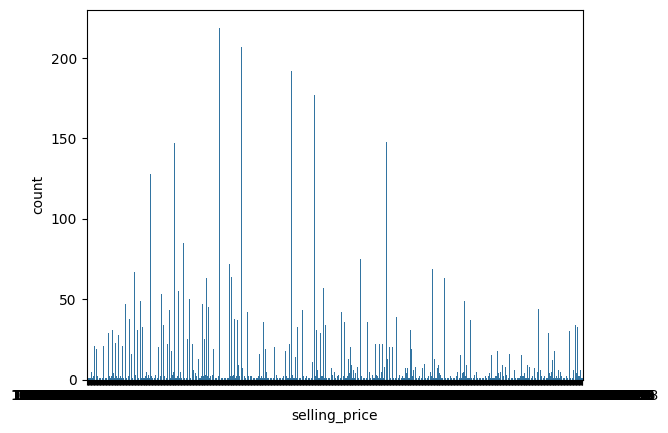

In [28]:
sns.countplot(data=df, x='selling_price')

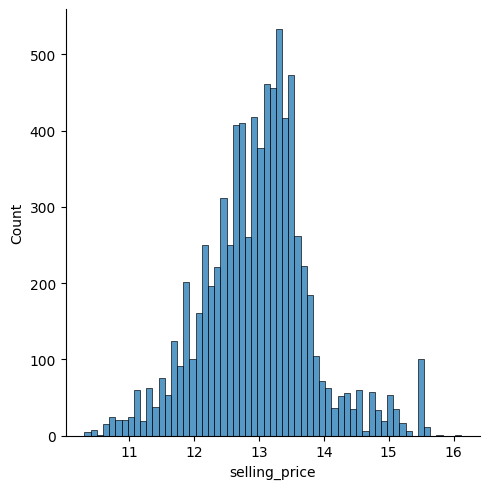

In [29]:
sns.displot(data = df, x = 'selling_price')

# Feature Selections

Choosing features


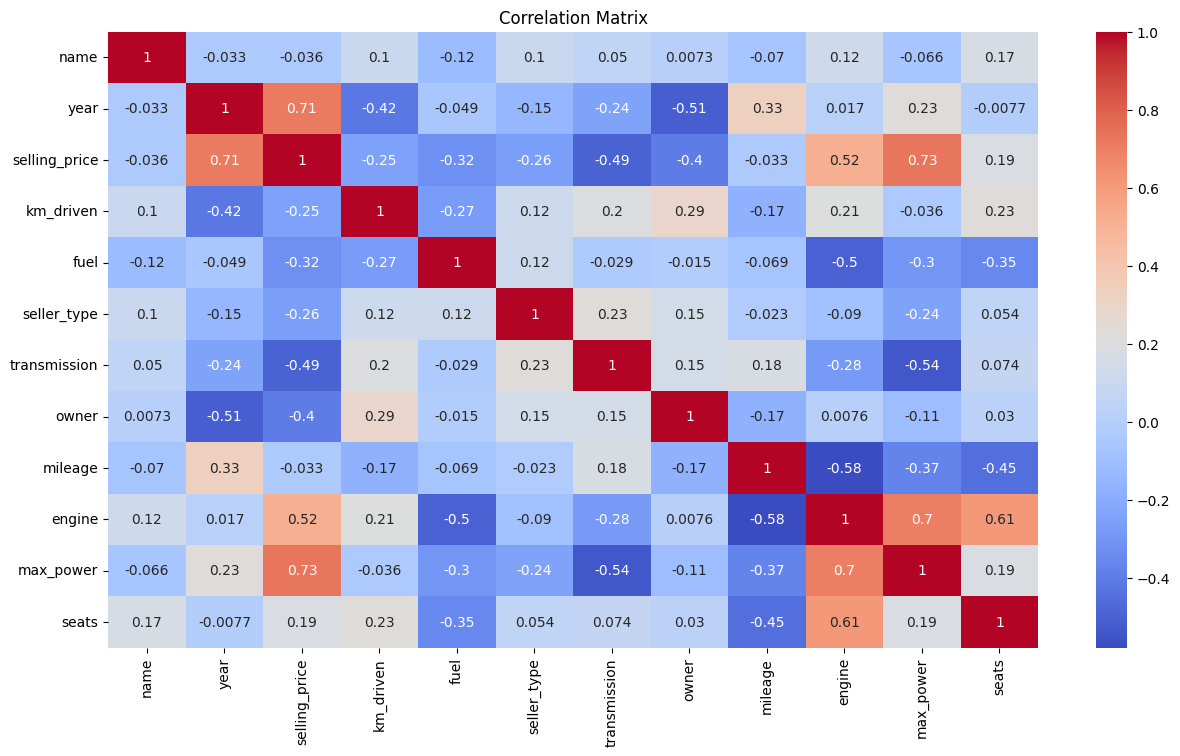

In [30]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate correlation matrix
# # Select only numeric columns for correlation matrix
# numeric_df = df.select_dtypes(include=[np.number])

# # Calculate the correlation matrix
# corr = numeric_df.corr()

# Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Show plot
plt.title("Correlation Matrix")
plt.show()



Selecting Features


In [31]:
#features-selection
selected_features = ['year', 'max_power', 'engine', 'owner', 'fuel','transmission']
X = df[selected_features]
y = df['selling_price']


Model Splitting


In [32]:
#Model Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Checking null values


In [33]:
X_train[['year','max_power','engine','owner','fuel','transmission']].isna().sum()

year              0
max_power       149
engine          154
owner             0
fuel              0
transmission      0
dtype: int64

In [34]:
X_test[['year','max_power','engine','owner','fuel','transmission']].isna().sum()

year             0
max_power       59
engine          60
owner            0
fuel             0
transmission     0
dtype: int64

In [35]:
y_train.isna().sum()

np.int64(0)

In [36]:
y_test.isna().sum()

np.int64(0)

Filling Missing Values


In [37]:
#For training set
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

# For testing set
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)

In [38]:
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

Checking Missing Values again


In [39]:
X_train[['engine', 'max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [40]:
X_test[['engine', 'max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [41]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

# Scaling


In [42]:
from sklearn.preprocessing import StandardScaler
import pickle

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully as 'scaler.pkl'")

Scaler saved successfully as 'scaler.pkl'


In [43]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 6)
Shape of X_test:  (2409, 6)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Training Data


In [44]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [45]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.08529496 -0.09052891 -0.10163062 -0.09677684 -0.1082291 ]; Mean: -0.09649208318474571
SVR - Score: [-0.08059086 -0.07037232 -0.07376673 -0.07247988 -0.07946096]; Mean: -0.07533415214255454
KNeighbors Regressor - Score: [-0.07058964 -0.06791644 -0.06744196 -0.07854686 -0.06795426]; Mean: -0.07048983450834403
Decision-Tree Regressor - Score: [-0.07620183 -0.07334281 -0.07031525 -0.07916201 -0.07575539]; Mean: -0.07495545710053186
Random-Forest Regressor - Score: [-0.05522464 -0.05662693 -0.05376887 -0.05491588 -0.05820086]; Mean: -0.055747434780291726


# Grid Search


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [47]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [48]:
best_mse = grid.best_score_

In [49]:
best_mse

np.float64(-0.056264752959750176)

In [50]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set using the best model
yhat = grid.predict(X_test)

# Calculate the Mean Squared Error (MSE)
test_mse = mean_squared_error(y_test, yhat)

print(f"Test Mean Squared Error: {test_mse}")


Test Mean Squared Error: 0.05361914061261644


In [51]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.47913201, 0.41120515, 0.09145567, 0.00655727, 0.00840905,
       0.00324085])

<BarContainer object of 6 artists>

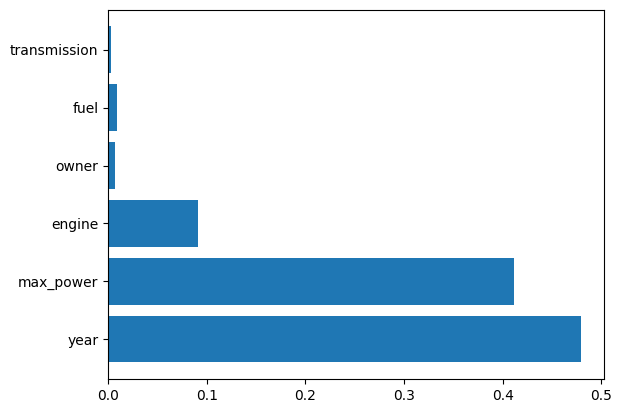

In [52]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

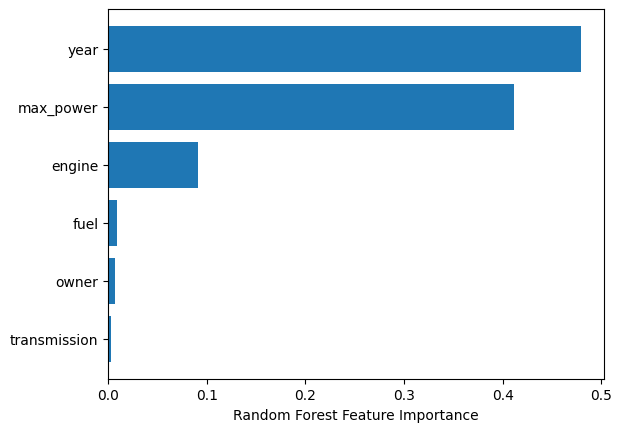

In [53]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

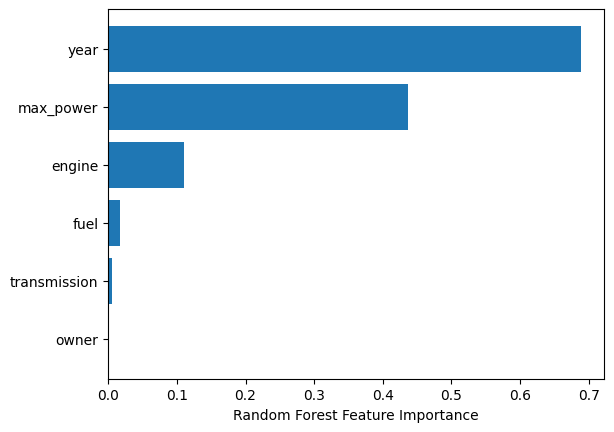

In [54]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [55]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

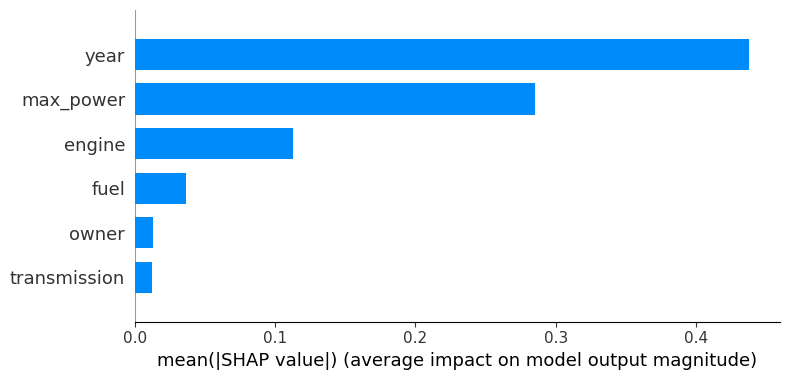

In [56]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# Inference


In [57]:
import pickle

# save the model to disk
filename = 'car_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [58]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
df[['year', 'max_power', 'engine','owner','fuel','transmission']].loc[2]

year            2006.0
max_power         78.0
engine          1497.0
owner              3.0
fuel               1.0
transmission       1.0
Name: 2, dtype: float64

# Testing


In [60]:
sample = np.array([[2015, 80, 1000, 2,1,1]]) 
sample = scaler.transform(sample)
predicted_car_price = loaded_model.predict(sample)
predicted_car_price_original_scale = np.exp(predicted_car_price)
print(predicted_car_price_original_scale)

[478037.89220101]


In [61]:
sample_1 = np.array([[2000, 40, 1800, 1,1,1]])
sample_1 = scaler.transform(sample_1)
predicted_car_price_1 = loaded_model.predict(sample_1)
predicted_car_price_1_original_scale = np.exp(predicted_car_price_1)  # Reverse log transformation
print(predicted_car_price_1_original_scale)

# Sample 2 (new sample)
sample_2 = np.array([[2015, 50, 1500, 2,1,0]])
sample_2 = scaler.transform(sample_2)
predicted_car_price_2 = loaded_model.predict(sample_2)
predicted_car_price_2_original_scale = np.exp(predicted_car_price_2)  # Reverse log transformation
print(predicted_car_price_2_original_scale)

[88297.38323244]
[479178.1633361]


In [62]:
sample = np.array([[2015, 55, 1250, 1,0,1]])
sample2=np.array([[2000, 38, 1550, 1,0,1]])

# Scale the new sample using the same scaler
scaled_sample = scaler.transform(sample)
scaled_sample2 = scaler.transform(sample2)

# Make predictions using the loaded model
predicted_price = loaded_model.predict(scaled_sample)
predicted_price2 = loaded_model.predict(scaled_sample2)

# Reverse the log transformation (since you applied np.log)
predicted_price_original_scale = np.exp(predicted_price)
predicted_price_original_scale2 = np.exp(predicted_price2)

print(f"Predicted car price: {predicted_price_original_scale}")
print(f"Predicted car price: {predicted_price_original_scale2}")

Predicted car price: [377610.24101721]
Predicted car price: [71753.1290139]


# Report

---


In this dataset, the details are about the cars and their features like sales price, engine, fuel type, etc.

From this dataset, we can find that the important feature would be the sales price of the car.

To find any correlation between the rest of the features of the dataset, we can use the correlation matrix. From there I picked the year, max power, engine, fuel type, owner type and transmission type as the features for the model. We can see that the year, and the max power of the car are the most important features that would affect the sales price of the car while the others are moderately important. The features or columns that were not selected such as car brand names, mileage and others weren't picked as the correlation score is very low.

If we look in the common sense as well, the newer car models would yield higher price and the car with more power would also yield higher price. The fuel type, engine and the transmission type would also affect the price of the car as they define the car's performance. The owner type would also affect the price of the car negatively as the car with more owners would be more used and would have more wear and tear.

After using these features, I train the model using the Linear Regression model, SVR, KNeighbors Regressor, Decision-Tree Regressor, and Random-Forest Regressor to see which model would be the best. From the result, we can see that the Random-Forest Regressor is the best model with the Mean squared error of 0.05570862886625344 which is the lowest among the 5 models. The highest MSE algorithms would be the Linear Regression model, and the SVR model as they can't handle the nonlinear relationships and interactions between features of the data set very well.
Therefore I use the Random-Forest Regressor model to predict the sales price of the car.
